In [19]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
suppressMessages(suppressWarnings(library("pheatmap")))
show_env()

You are in Singularity: singularity_proj_combeffect 
BASE DIRECTORY:     /data/reddylab/Kuei 
WORK DIRECTORY:     /data/reddylab/Kuei/out 
CODE DIRECTORY:     /data/reddylab/Kuei/code 
PATH OF SOURCE:     /data/reddylab/Kuei/source 
PATH OF EXECUTABLE: /data/reddylab/Kuei/bin 
PATH OF ANNOTATION: /data/reddylab/Kuei/annotation 
PATH OF PROJECT:    /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS:    /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 


In [11]:
fdiry = file.path(FD_RES, "results", "comparison", "comparison_global")
fname = "List_combine_Log2FC.RDS"
fpath = file.path(fdiry, fname)
lst = readRDS(fpath)

lst_peak_Log2FC = lst
cat(names(lst), "\n\n")
cat(colnames(lst[[1]]), "\n\n")
for(dat in lst){
    print(dim(dat))
    print(head(dat, 3))
    cat("\n")
}

KS91_K562_ASTARRseq A001_K562_WSTARRseq Tewhey_K562_TileMPRA 

Chrom Start End Peak Region baseMean log2FoldChange lfcSE stat pvalue padj Assay 

[1] 417  12
# A tibble: 3 × 12
  Chrom     Start       End Peak    Region baseM…¹ log2F…²  lfcSE  stat   pvalue
  <chr>     <dbl>     <dbl> <chr>   <chr>    <dbl>   <dbl>  <dbl> <dbl>    <dbl>
1 chr8  126778902 126779728 chr8_1… MYC      426.    0.425 0.0658  6.45 1.10e-10
2 chr8  126782925 126783318 chr8_1… MYC       56.4   0.561 0.165   3.39 6.96e- 4
3 chr8  126804776 126805825 chr8_1… MYC      647.    0.548 0.0531 10.3  5.65e-25
# … with 2 more variables: padj <dbl>, Assay <fct>, and abbreviated variable
#   names ¹​baseMean, ²​log2FoldChange

[1] 417  12
# A tibble: 3 × 12
  Chrom    Start    End Peak  Region baseM…¹ log2F…² lfcSE   stat  pvalue   padj
  <chr>    <dbl>  <dbl> <chr> <chr>    <dbl>   <dbl> <dbl>  <dbl>   <dbl>  <dbl>
1 chr8    1.27e8 1.27e8 chr8… MYC       39.7 -0.0741 0.226 -0.327 0.743   0.891 
2 chr8    1.27e8 1.27e8 chr

In [10]:
fdiry = file.path(FD_RES, "results", "comparison", "comparison_global")
fname = "result.chromatin_accessibility.subset.tsv"
fpath = file.path(fdiry, fname)
dat = read_tsv(fpath, show_col_types = FALSE)

dat_peak_info = dat
print(dim(dat))
head(dat)

[1] 417  11


Chrom,Start,End,Peak,Region,Input,Length,Pct_GC,Residual,Score,Name
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
chr8,126778902,126779728,chr8_126778902_126779728,MYC,1.7601910,826,0.412833,1.0832767,0.1411570,Chromatin Accessibility
chr8,126782925,126783318,chr8_126782925_126783318,MYC,0.2234409,393,0.340967,1.5504912,0.1456905,Chromatin Accessibility
chr8,126804776,126805825,chr8_126804776_126805825,MYC,2.5906950,1049,0.526215,0.1977288,0.1325643,Chromatin Accessibility
chr8,126817018,126817490,chr8_126817018_126817490,MYC,0.4259708,472,0.451271,0.5169287,0.1356616,Chromatin Accessibility
chr8,126820465,126821393,chr8_126820465_126821393,MYC,1.1059287,928,0.528017,-0.9230415,0.1216892,Chromatin Accessibility
chr8,126824093,126824987,chr8_126824093_126824987,MYC,0.6657159,894,0.430649,-0.3843919,0.1269158,Chromatin Accessibility


In [59]:
lst = lst_peak_Log2FC
dat = bind_rows(lst) %>% 
    dplyr::select(Peak, log2FoldChange, Assay) %>% 
    tidyr::spread(Assay, log2FoldChange)
    #dplyr::mutate(conf = recode(conf, 'East' = 'E', 'West' = 'W', 'North' = 'N')

dat = dat_peak_info %>% 
    dplyr::select(Peak, Region, Pct_GC, Length) %>%
    dplyr::left_join(., dat, by="Peak")

print(dim(dat))
head(dat)

[1] 417   7


Peak,Region,Pct_GC,Length,KS91_K562_ASTARRseq,A001_K562_WSTARRseq,Tewhey_K562_TileMPRA
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr8_126778902_126779728,MYC,0.412833,826,0.4248381,-0.0741314,2.0452762
chr8_126782925_126783318,MYC,0.340967,393,0.5611154,0.2312918,-0.0965872
chr8_126804776_126805825,MYC,0.526215,1049,0.5479907,0.5462629,1.9773708
chr8_126817018_126817490,MYC,0.451271,472,-0.8449595,-0.5126171,-0.2366357
chr8_126820465_126821393,MYC,0.528017,928,-0.4738180,-0.1796884,0.2009165
chr8_126824093_126824987,MYC,0.430649,894,0.4855128,-0.3160036,2.0956013


In [61]:
mat = dat %>% dplyr::select(-Peak, -Region)
mat = cor(mat, method = "spearman")
mat

,Pct_GC,Length,KS91_K562_ASTARRseq,A001_K562_WSTARRseq,Tewhey_K562_TileMPRA
Pct_GC,1.0000000,0.2012992,-0.1945452,0.3450349,0.1602051
Length,0.2012992,1.0000000,0.2082459,0.2377121,0.2589130
KS91_K562_ASTARRseq,-0.1945452,0.2082459,1.0000000,0.4353820,0.4238038
A001_K562_WSTARRseq,0.3450349,0.2377121,0.4353820,1.0000000,0.5158172
Tewhey_K562_TileMPRA,0.1602051,0.2589130,0.4238038,0.5158172,1.0000000


In [62]:
print(range(mat))

[1] -0.1945452  1.0000000


In [71]:
### https://stackoverflow.com/questions/31677923/set-0-point-for-pheatmap-in-r
paletteLength <- 50
myColor = colorRampPalette(c("#6baed6", "#9ecae1", "#e0f3f8", "white", "#ffffbf", "#f46d43", "#d73027"))(paletteLength)
myBreaks <- c(
    seq(
        -0.5, 
        0, 
        length.out=ceiling(paletteLength/2) + 1), 
    seq(
        max(mat)/paletteLength, 
        max(mat), 
        length.out=floor(paletteLength/2))
)

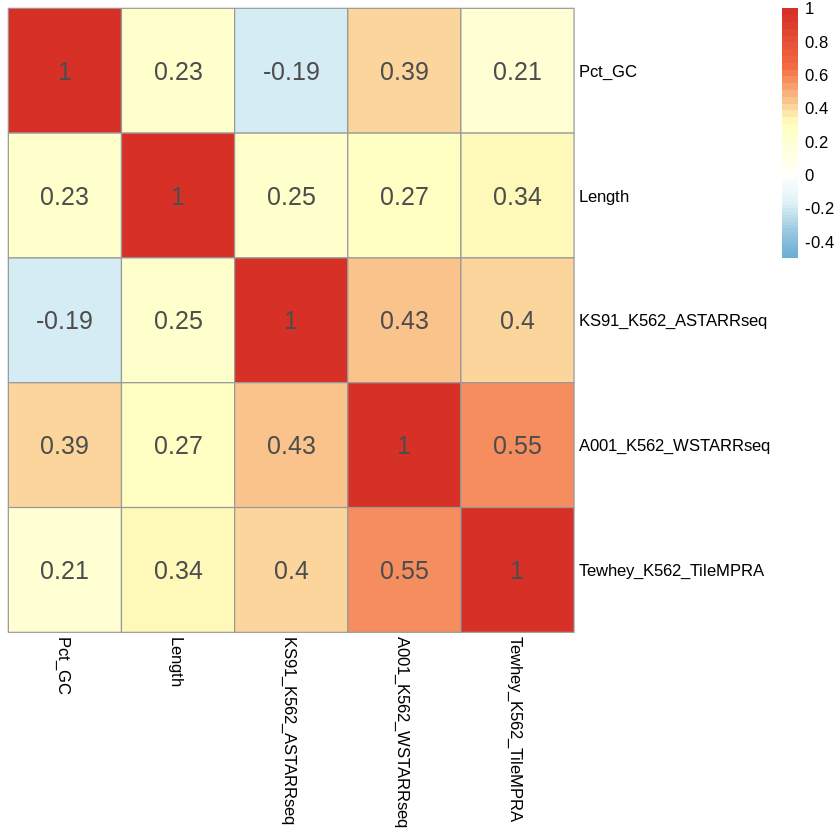

In [72]:
options(repr.plot.height=7, repr.plot.width=7)
pheatmap(mat, color=myColor, breaks=myBreaks, display_numbers = round(mat,2), fontsize_number=15, 
         cluster_rows = FALSE, cluster_cols = FALSE)

In [66]:
lst = split(dat, dat$Region)
lst = lapply(lst, function(dat){
    mat = dat %>% dplyr::select(-Peak, -Region)
    mat = cor(mat, method = "spearman")
    return(mat)
})
names(lst)

[1] "FADS"  "GATA1" "MYC"

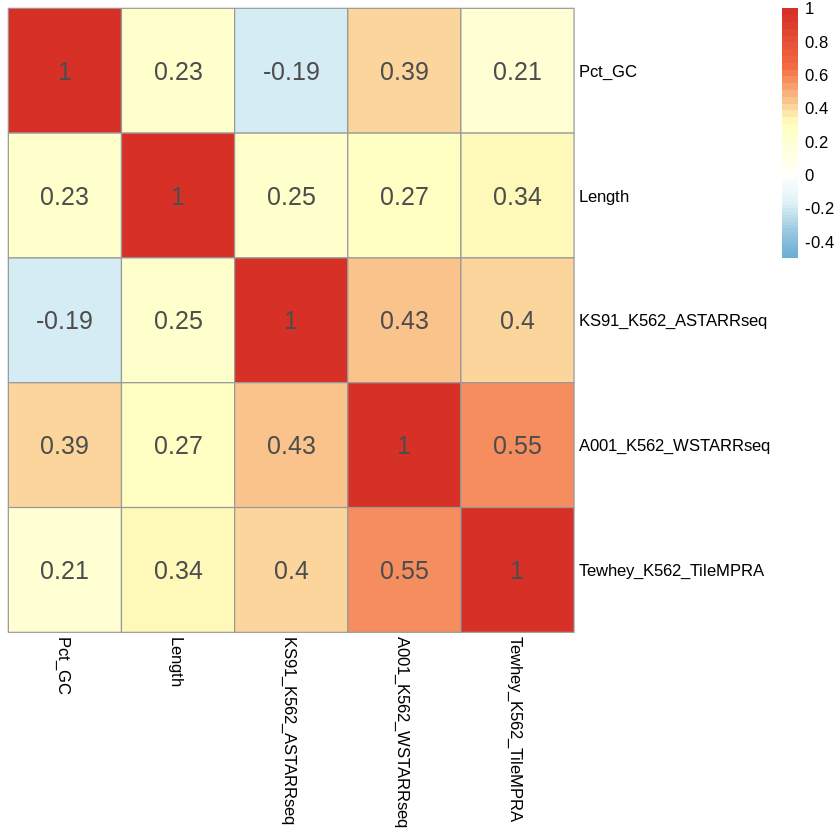

In [73]:
mat = lst[["GATA1"]]

options(repr.plot.height=7, repr.plot.width=7)
pheatmap(mat, color=myColor, breaks=myBreaks, display_numbers = round(mat,2), fontsize_number=15, 
         cluster_rows = FALSE, cluster_cols = FALSE)

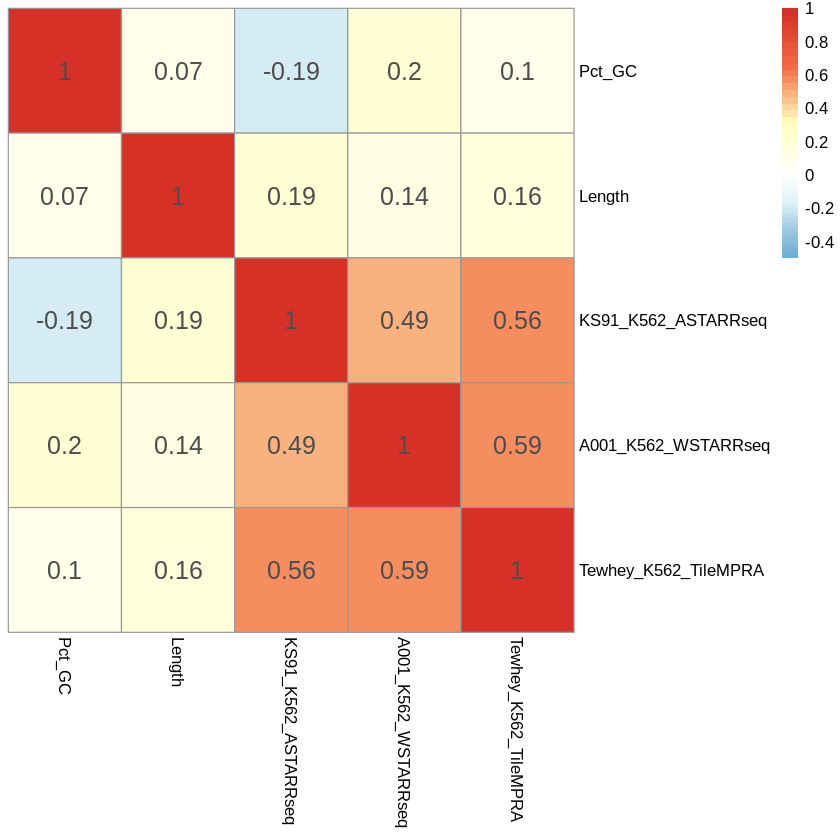

In [74]:
mat = lst[["MYC"]]

options(repr.plot.height=7, repr.plot.width=7)
pheatmap(mat, color=myColor, breaks=myBreaks, display_numbers = round(mat,2), fontsize_number=15, 
         cluster_rows = FALSE, cluster_cols = FALSE)

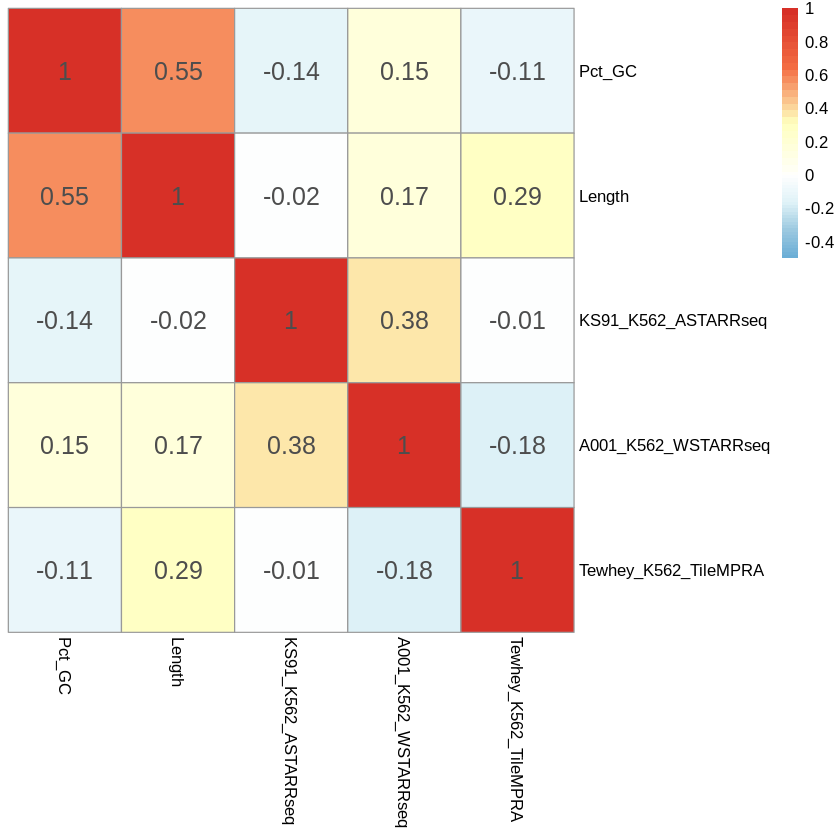

In [75]:
mat = lst[["FADS"]]

options(repr.plot.height=7, repr.plot.width=7)
pheatmap(mat, color=myColor, breaks=myBreaks, display_numbers = round(mat,2), fontsize_number=15, 
         cluster_rows = FALSE, cluster_cols = FALSE)